# D208 Predictive Modeling | **PA Task 2** | FILE 4
### Research Question: What factors influence customer churn?

In [1]:
import sys
print(sys.version)

3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from statsmodels.formula.api import ols
from statsmodels.api import qqplot 
from statsmodels.formula.api import logit
from statsmodels.graphics.mosaicplot import mosaic

In [3]:
df= pd.read_csv('prepared_dataset_churn_D208.csv')
df.head()

,Population,Age,Income,Churn,Outage_sec_perweek,Yearly_equip_failure,Techie,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,StreamingTV,StreamingMovies,Tenure,MonthlyCharge,Bandwidth_GB_Year,InternetService_DSL,InternetService_Fiber Optic
0,38,68,28561.99,0,7.978323,1,0,1,1,1,0,1,1,0,1,6.795513,172.455519,904.536110,0,1
1,10446,27,21704.77,1,11.699080,1,1,0,1,1,1,1,0,1,1,1.156681,242.632554,800.982766,0,1
2,3735,50,9609.57,0,10.752800,1,1,1,0,1,1,0,0,0,1,15.754144,159.947583,2054.706961,1,0
3,13863,48,18925.23,0,14.913540,0,1,0,0,1,0,1,0,1,0,17.087227,119.956840,2164.579412,1,0
4,11352,83,40074.19,1,8.147417,1,0,1,0,0,0,0,0,1,0,1.670972,149.948316,271.493436,0,1


In [4]:
df.rename(columns={'InternetService_Fiber Optic' : 'InternetService_FiberOptic'}, inplace=True)
df.head()

,Population,Age,Income,Churn,Outage_sec_perweek,Yearly_equip_failure,Techie,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,StreamingTV,StreamingMovies,Tenure,MonthlyCharge,Bandwidth_GB_Year,InternetService_DSL,InternetService_FiberOptic
0,38,68,28561.99,0,7.978323,1,0,1,1,1,0,1,1,0,1,6.795513,172.455519,904.536110,0,1
1,10446,27,21704.77,1,11.699080,1,1,0,1,1,1,1,0,1,1,1.156681,242.632554,800.982766,0,1
2,3735,50,9609.57,0,10.752800,1,1,1,0,1,1,0,0,0,1,15.754144,159.947583,2054.706961,1,0
3,13863,48,18925.23,0,14.913540,0,1,0,0,1,0,1,0,1,0,17.087227,119.956840,2164.579412,1,0
4,11352,83,40074.19,1,8.147417,1,0,1,0,0,0,0,0,1,0,1.670972,149.948316,271.493436,0,1


# INITIAL MODEL

In [5]:
model_initial = logit("Churn ~ Bandwidth_GB_Year + MonthlyCharge + Population + Age + Income + Outage_sec_perweek + Yearly_equip_failure + Techie + Port_modem + Tablet + Phone + Multiple + OnlineSecurity + OnlineBackup + StreamingTV + StreamingMovies + Tenure + InternetService_DSL + InternetService_FiberOptic", 
                      data=df).fit()

Optimization terminated successfully.
         Current function value: 0.303971
         Iterations 8


In [6]:
model_initial.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 9991
Model:                          Logit   Df Residuals:                     9971
Method:                           MLE   Df Model:                           19
Date:                Mon, 20 Nov 2023   Pseudo R-squ.:                  0.4745
Time:                        21:35:31   Log-Likelihood:                -3037.0
converged:                       True   LL-Null:                       -5779.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -4.6518      0.305    -15.269      0.000      -5.249      -4.055
Bandwidth_GB_Year              0.0004      0.000      1.023      0.306      -0.000       0.001
MonthlyCharge                  0.0228      0.003      7.440      0.000       0.017       0.029
Population                 -1.606e-06    2.3e-06     -0.699      0.484    -6.1e-06    2.89e-06
Age                            0.0039      0.002      1.870      0.062      -0.000       0.008
Income                      7.691e-07   1.16e-06      0.665      0.506    -1.5e-06    3.04e-06
Outage_sec_perweek            -0.0007      0.011     -0.061      0.951      -0.022       0.021
Yearly_equip_failure          -0.0374      0.051     -0.730      0.465      -0.138       0.063
Techie                         0.7352      0.084      8.771      0.000       0.571       0.900
Port_modem                     0.1135      0.065      1.756      0.079      -0.013       0.240
Tablet                        -0.0490      0.070     -0.698      0.485      -0.187       0.089
Phone                         -0.2681      0.109     -2.464      0.014      -0.481      -0.055
Multiple                       0.3752      0.111      3.381      0.001       0.158       0.593
OnlineSecurity                -0.2455      0.074     -3.335      0.001      -0.390      -0.101
OnlineBackup                   0.0295      0.089      0.332      0.740      -0.145       0.204
StreamingTV                    1.0013      0.141      7.099      0.000       0.725       1.278
StreamingMovies                1.2221      0.161      7.611      0.000       0.907       1.537
Tenure                        -0.1182      0.033     -3.545      0.000      -0.183      -0.053
InternetService_DSL            0.4758      0.177      2.683      0.007       0.128       0.823
InternetService_FiberOptic    -0.7187      0.132     -5.425      0.000      -0.978      -0.459
==============================================================================================
"""

# REDUCED MODEL

### VIF - reduce multicollinearity

In [7]:
#use Variance Inflation Factor (VIF) to detect multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [8]:
def compute_vif(considered_features):
    X = df[considered_features]
    X['intercept'] = 1
    vif = pd.DataFrame()
    vif['Variable'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
    vif = vif[vif['Variable'] != 'intercept']
    return vif

In [9]:
considered_features = ['Population',
                       'Age', 
                       'Income',
                       'Bandwidth_GB_Year',
                       'Outage_sec_perweek',
                       'Yearly_equip_failure',
                       'Techie',
                       'Port_modem',
                       'Tablet',
                       'Phone',
                       'Multiple',
                       'OnlineSecurity',
                       'OnlineBackup',
                       'StreamingTV',
                       'StreamingMovies',
                       'Tenure',
                       'MonthlyCharge',
                       'InternetService_DSL',
                       'InternetService_FiberOptic']

compute_vif(considered_features).sort_values('VIF', ascending = False)

,Variable,VIF
3,Bandwidth_GB_Year,745.288275
15,Tenure,732.766794
16,MonthlyCharge,15.226375
17,InternetService_DSL,6.814354
14,StreamingMovies,5.582549
13,StreamingTV,4.245786
18,InternetService_FiberOptic,3.877516
10,Multiple,2.784368
12,OnlineBackup,1.852535
1,Age,1.756425


In [10]:
# Bandwidth_GB_Year has the highest VIF of 745. Remove from model. then repeat for highest vif.

considered_features.remove('Bandwidth_GB_Year')
compute_vif(considered_features).sort_values('VIF', ascending = False)

C:\Users\kaili\AppData\Local\Temp\ipykernel_18588\3653474630.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Variable,VIF
15,MonthlyCharge,12.135057
13,StreamingMovies,5.516394
12,StreamingTV,3.929656
17,InternetService_FiberOptic,3.428829
9,Multiple,2.729979
16,InternetService_DSL,1.965147
11,OnlineBackup,1.837034
10,OnlineSecurity,1.015134
7,Tablet,1.002314
8,Phone,1.002201


In [11]:
# Now MonthlyCharge has highest VIF of 12. Remove from model. then repeat for highest vif.

considered_features.remove('MonthlyCharge')
compute_vif(considered_features).sort_values('VIF', ascending = False)

C:\Users\kaili\AppData\Local\Temp\ipykernel_18588\3653474630.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Variable,VIF
15,InternetService_DSL,1.718585
16,InternetService_FiberOptic,1.718487
7,Tablet,1.002088
10,OnlineSecurity,1.001523
14,Tenure,1.001407
9,Multiple,1.001309
8,Phone,1.001289
13,StreamingMovies,1.001228
3,Outage_sec_perweek,1.001088
1,Age,1.001076


- now multicollinearity has been reduced since all values have VIF < 10
- remove from model and then check p-values on coefficients

## Reduced Model 1

In [13]:
model_reduced1 = logit("Churn ~ Population + Age + Income + Outage_sec_perweek + Yearly_equip_failure + Techie + Port_modem + Tablet + Phone + Multiple + OnlineSecurity + OnlineBackup + StreamingTV + StreamingMovies + Tenure + InternetService_DSL + InternetService_FiberOptic", 
                      data=df).fit()

Optimization terminated successfully.
         Current function value: 0.307986
         Iterations 8


In [14]:
model_reduced1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 9991
Model:                          Logit   Df Residuals:                     9973
Method:                           MLE   Df Model:                           17
Date:                Mon, 20 Nov 2023   Pseudo R-squ.:                  0.4676
Time:                        21:55:06   Log-Likelihood:                -3077.1
converged:                       True   LL-Null:                       -5779.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -2.7865      0.214    -13.024      0.000      -3.206      -2.367
Population                 -1.824e-06   2.28e-06     -0.800      0.424   -6.29e-06    2.65e-06
Age                            0.0028      0.002      1.809      0.070      -0.000       0.006
Income                      1.071e-06   1.16e-06      0.928      0.354   -1.19e-06    3.34e-06
Outage_sec_perweek            -0.0020      0.011     -0.189      0.850      -0.023       0.019
Yearly_equip_failure          -0.0380      0.051     -0.744      0.457      -0.138       0.062
Techie                         0.7586      0.084      9.036      0.000       0.594       0.923
Port_modem                     0.1069      0.064      1.663      0.096      -0.019       0.233
Tablet                        -0.0481      0.070     -0.689      0.491      -0.185       0.089
Phone                         -0.2938      0.109     -2.704      0.007      -0.507      -0.081
Multiple                       1.1391      0.067     17.045      0.000       1.008       1.270
OnlineSecurity                -0.1399      0.067     -2.083      0.037      -0.272      -0.008
OnlineBackup                   0.5729      0.065      8.794      0.000       0.445       0.701
StreamingTV                    2.0954      0.074     28.440      0.000       1.951       2.240
StreamingMovies                2.5273      0.076     33.134      0.000       2.378       2.677
Tenure                        -0.0808      0.002    -42.340      0.000      -0.085      -0.077
InternetService_DSL            0.9334      0.090     10.401      0.000       0.757       1.109
InternetService_FiberOptic     0.0168      0.087      0.193      0.847      -0.153       0.187
==============================================================================================
"""

In [17]:
# Outage_sec_perweek highest p > 0.05. Remove from model
model_reduced2 = logit("Churn ~ Population + Age + Income + Yearly_equip_failure + Techie + Port_modem + Tablet + Phone + Multiple + OnlineSecurity + OnlineBackup + StreamingTV + StreamingMovies + Tenure + InternetService_DSL + InternetService_FiberOptic", 
                      data=df).fit()

model_reduced2.summary()

Optimization terminated successfully.
         Current function value: 0.307988
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 9991
Model:                          Logit   Df Residuals:                     9974
Method:                           MLE   Df Model:                           16
Date:                Mon, 20 Nov 2023   Pseudo R-squ.:                  0.4676
Time:                        21:56:56   Log-Likelihood:                -3077.1
converged:                       True   LL-Null:                       -5779.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -2.8070      0.184    -15.239      0.000      -3.168      -2.446
Population                  -1.83e-06   2.28e-06     -0.802      0.422    -6.3e-06    2.64e-06
Age                            0.0028      0.002      1.811      0.070      -0.000       0.006
Income                      1.076e-06   1.15e-06      0.931      0.352   -1.19e-06    3.34e-06
Yearly_equip_failure          -0.0381      0.051     -0.746      0.456      -0.138       0.062
Techie                         0.7585      0.084      9.036      0.000       0.594       0.923
Port_modem                     0.1068      0.064      1.661      0.097      -0.019       0.233
Tablet                        -0.0482      0.070     -0.691      0.490      -0.185       0.089
Phone                         -0.2935      0.109     -2.702      0.007      -0.506      -0.081
Multiple                       1.1390      0.067     17.044      0.000       1.008       1.270
OnlineSecurity                -0.1398      0.067     -2.082      0.037      -0.271      -0.008
OnlineBackup                   0.5727      0.065      8.793      0.000       0.445       0.700
StreamingTV                    2.0953      0.074     28.440      0.000       1.951       2.240
StreamingMovies                2.5272      0.076     33.134      0.000       2.378       2.677
Tenure                        -0.0808      0.002    -42.344      0.000      -0.085      -0.077
InternetService_DSL            0.9335      0.090     10.404      0.000       0.758       1.109
InternetService_FiberOptic     0.0168      0.087      0.194      0.846      -0.153       0.187
==============================================================================================
"""

In [18]:
# InternetService_FiberOptic highest p > 0.05. Remove from model
model_reduced3 = logit("Churn ~ Population + Age + Income + Yearly_equip_failure + Techie + Port_modem + Tablet + Phone + Multiple + OnlineSecurity + OnlineBackup + StreamingTV + StreamingMovies + Tenure + InternetService_DSL", 
                      data=df).fit()

model_reduced3.summary()

Optimization terminated successfully.
         Current function value: 0.307989
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 9991
Model:                          Logit   Df Residuals:                     9975
Method:                           MLE   Df Model:                           15
Date:                Mon, 20 Nov 2023   Pseudo R-squ.:                  0.4676
Time:                        21:57:32   Log-Likelihood:                -3077.1
converged:                       True   LL-Null:                       -5779.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.7957      0.175    -16.003      0.000      -3.138      -2.453
Population           -1.828e-06   2.28e-06     -0.802      0.423    -6.3e-06    2.64e-06
Age                      0.0028      0.002      1.810      0.070      -0.000       0.006
Income                1.078e-06   1.15e-06      0.933      0.351   -1.19e-06    3.34e-06
Yearly_equip_failure    -0.0381      0.051     -0.745      0.456      -0.138       0.062
Techie                   0.7588      0.084      9.041      0.000       0.594       0.923
Port_modem               0.1069      0.064      1.663      0.096      -0.019       0.233
Tablet                  -0.0484      0.070     -0.693      0.488      -0.185       0.088
Phone                   -0.2940      0.109     -2.707      0.007      -0.507      -0.081
Multiple                 1.1394      0.067     17.056      0.000       1.008       1.270
OnlineSecurity          -0.1396      0.067     -2.079      0.038      -0.271      -0.008
OnlineBackup             0.5728      0.065      8.794      0.000       0.445       0.700
StreamingTV              2.0953      0.074     28.439      0.000       1.951       2.240
StreamingMovies          2.5272      0.076     33.134      0.000       2.378       2.677
Tenure                  -0.0808      0.002    -42.344      0.000      -0.085      -0.077
InternetService_DSL      0.9222      0.068     13.538      0.000       0.789       1.056
========================================================================================
"""

In [53]:
# Tablet highest p > 0.05. Remove from model
model_reduced4 = logit("Churn ~ Population + Age + Income + Yearly_equip_failure + Techie + Port_modem + Phone + Multiple + OnlineSecurity + OnlineBackup + StreamingTV + StreamingMovies + Tenure + InternetService_DSL", 
                      data=df).fit()

model_reduced4.summary()

Optimization terminated successfully.
         Current function value: 0.308014
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 9991
Model:                          Logit   Df Residuals:                     9976
Method:                           MLE   Df Model:                           14
Date:                Wed, 22 Nov 2023   Pseudo R-squ.:                  0.4675
Time:                        13:44:12   Log-Likelihood:                -3077.4
converged:                       True   LL-Null:                       -5779.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.8089      0.174    -16.172      0.000      -3.149      -2.468
Population           -1.835e-06   2.28e-06     -0.805      0.421    -6.3e-06    2.63e-06
Age                      0.0028      0.002      1.817      0.069      -0.000       0.006
Income                1.076e-06   1.15e-06      0.932      0.352   -1.19e-06    3.34e-06
Yearly_equip_failure    -0.0379      0.051     -0.742      0.458      -0.138       0.062
Techie                   0.7570      0.084      9.026      0.000       0.593       0.921
Port_modem               0.1070      0.064      1.665      0.096      -0.019       0.233
Phone                   -0.2961      0.109     -2.728      0.006      -0.509      -0.083
Multiple                 1.1406      0.067     17.079      0.000       1.010       1.271
OnlineSecurity          -0.1395      0.067     -2.078      0.038      -0.271      -0.008
OnlineBackup             0.5730      0.065      8.798      0.000       0.445       0.701
StreamingTV              2.0953      0.074     28.441      0.000       1.951       2.240
StreamingMovies          2.5261      0.076     33.132      0.000       2.377       2.676
Tenure                  -0.0808      0.002    -42.346      0.000      -0.085      -0.077
InternetService_DSL      0.9220      0.068     13.537      0.000       0.789       1.056
========================================================================================
"""

In [54]:
# Yearly_equip_failure highest p > 0.05. Remove from model
model_reduced5 = logit("Churn ~ Population + Age + Income + Techie + Port_modem + Phone + Multiple + OnlineSecurity + OnlineBackup + StreamingTV + StreamingMovies + Tenure + InternetService_DSL", 
                      data=df).fit()

model_reduced5.summary()

Optimization terminated successfully.
         Current function value: 0.308041
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 9991
Model:                          Logit   Df Residuals:                     9977
Method:                           MLE   Df Model:                           13
Date:                Wed, 22 Nov 2023   Pseudo R-squ.:                  0.4675
Time:                        13:45:23   Log-Likelihood:                -3077.6
converged:                       True   LL-Null:                       -5779.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -2.8255      0.172    -16.398      0.000      -3.163      -2.488
Population          -1.829e-06   2.28e-06     -0.803      0.422    -6.3e-06    2.64e-06
Age                     0.0028      0.002      1.815      0.070      -0.000       0.006
Income               1.072e-06   1.15e-06      0.928      0.353   -1.19e-06    3.34e-06
Techie                  0.7575      0.084      9.033      0.000       0.593       0.922
Port_modem              0.1070      0.064      1.665      0.096      -0.019       0.233
Phone                  -0.2947      0.109     -2.715      0.007      -0.507      -0.082
Multiple                1.1402      0.067     17.076      0.000       1.009       1.271
OnlineSecurity         -0.1388      0.067     -2.068      0.039      -0.270      -0.007
OnlineBackup            0.5739      0.065      8.812      0.000       0.446       0.702
StreamingTV             2.0946      0.074     28.438      0.000       1.950       2.239
StreamingMovies         2.5267      0.076     33.142      0.000       2.377       2.676
Tenure                 -0.0808      0.002    -42.351      0.000      -0.085      -0.077
InternetService_DSL     0.9222      0.068     13.541      0.000       0.789       1.056
=======================================================================================
"""

In [55]:
# Population highest p > 0.05. Remove from model
model_reduced6 = logit("Churn ~ Age + Income + Techie + Port_modem + Phone + Multiple + OnlineSecurity + OnlineBackup + StreamingTV + StreamingMovies + Tenure + InternetService_DSL", 
                      data=df).fit()

model_reduced6.summary()

Optimization terminated successfully.
         Current function value: 0.308074
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 9991
Model:                          Logit   Df Residuals:                     9978
Method:                           MLE   Df Model:                           12
Date:                Wed, 22 Nov 2023   Pseudo R-squ.:                  0.4674
Time:                        13:46:17   Log-Likelihood:                -3078.0
converged:                       True   LL-Null:                       -5779.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -2.8417      0.171    -16.602      0.000      -3.177      -2.506
Age                     0.0028      0.002      1.796      0.073      -0.000       0.006
Income               1.086e-06   1.15e-06      0.941      0.347   -1.18e-06    3.35e-06
Techie                  0.7579      0.084      9.037      0.000       0.594       0.922
Port_modem              0.1071      0.064      1.666      0.096      -0.019       0.233
Phone                  -0.2953      0.109     -2.720      0.007      -0.508      -0.083
Multiple                1.1402      0.067     17.077      0.000       1.009       1.271
OnlineSecurity         -0.1393      0.067     -2.076      0.038      -0.271      -0.008
OnlineBackup            0.5732      0.065      8.804      0.000       0.446       0.701
StreamingTV             2.0951      0.074     28.446      0.000       1.951       2.240
StreamingMovies         2.5263      0.076     33.141      0.000       2.377       2.676
Tenure                 -0.0808      0.002    -42.351      0.000      -0.085      -0.077
InternetService_DSL     0.9229      0.068     13.553      0.000       0.789       1.056
=======================================================================================
"""

In [56]:
# Income highest p > 0.05. Remove from model
model_reduced7 = logit("Churn ~ Age + Techie + Port_modem + Phone + Multiple + OnlineSecurity + OnlineBackup + StreamingTV + StreamingMovies + Tenure + InternetService_DSL", 
                      data=df).fit()

model_reduced7.summary()

Optimization terminated successfully.
         Current function value: 0.308118
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 9991
Model:                          Logit   Df Residuals:                     9979
Method:                           MLE   Df Model:                           11
Date:                Wed, 22 Nov 2023   Pseudo R-squ.:                  0.4674
Time:                        13:46:54   Log-Likelihood:                -3078.4
converged:                       True   LL-Null:                       -5779.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -2.7969      0.164    -17.026      0.000      -3.119      -2.475
Age                     0.0028      0.002      1.790      0.073      -0.000       0.006
Techie                  0.7579      0.084      9.038      0.000       0.594       0.922
Port_modem              0.1063      0.064      1.655      0.098      -0.020       0.232
Phone                  -0.2956      0.109     -2.723      0.006      -0.508      -0.083
Multiple                1.1400      0.067     17.075      0.000       1.009       1.271
OnlineSecurity         -0.1407      0.067     -2.097      0.036      -0.272      -0.009
OnlineBackup            0.5728      0.065      8.799      0.000       0.445       0.700
StreamingTV             2.0949      0.074     28.444      0.000       1.951       2.239
StreamingMovies         2.5260      0.076     33.140      0.000       2.377       2.675
Tenure                 -0.0808      0.002    -42.352      0.000      -0.085      -0.077
InternetService_DSL     0.9243      0.068     13.575      0.000       0.791       1.058
=======================================================================================
"""

In [58]:
# Port_modem highest p > 0.05. Remove from model
model_reduced8 = logit("Churn ~ Age + Techie + Phone + Multiple + OnlineSecurity + OnlineBackup + StreamingTV + StreamingMovies + Tenure + InternetService_DSL", 
                      data=df).fit()

model_reduced8.summary()

Optimization terminated successfully.
         Current function value: 0.308255
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 9991
Model:                          Logit   Df Residuals:                     9980
Method:                           MLE   Df Model:                           10
Date:                Wed, 22 Nov 2023   Pseudo R-squ.:                  0.4671
Time:                        13:48:47   Log-Likelihood:                -3079.8
converged:                       True   LL-Null:                       -5779.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -2.7465      0.161    -17.034      0.000      -3.063      -2.430
Age                     0.0028      0.002      1.803      0.071      -0.000       0.006
Techie                  0.7549      0.084      9.009      0.000       0.591       0.919
Phone                  -0.2948      0.108     -2.718      0.007      -0.507      -0.082
Multiple                1.1382      0.067     17.057      0.000       1.007       1.269
OnlineSecurity         -0.1406      0.067     -2.096      0.036      -0.272      -0.009
OnlineBackup            0.5725      0.065      8.797      0.000       0.445       0.700
StreamingTV             2.0948      0.074     28.448      0.000       1.951       2.239
StreamingMovies         2.5260      0.076     33.145      0.000       2.377       2.675
Tenure                 -0.0807      0.002    -42.333      0.000      -0.084      -0.077
InternetService_DSL     0.9242      0.068     13.578      0.000       0.791       1.058
=======================================================================================
"""

In [59]:
# Age highest p > 0.05. Remove from model
model_reduced9 = logit("Churn ~ Techie + Phone + Multiple + OnlineSecurity + OnlineBackup + StreamingTV + StreamingMovies + Tenure + InternetService_DSL", 
                      data=df).fit()

model_reduced9.summary()

Optimization terminated successfully.
         Current function value: 0.308418
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 9991
Model:                          Logit   Df Residuals:                     9981
Method:                           MLE   Df Model:                            9
Date:                Wed, 22 Nov 2023   Pseudo R-squ.:                  0.4668
Time:                        13:49:30   Log-Likelihood:                -3081.4
converged:                       True   LL-Null:                       -5779.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -2.5972      0.138    -18.837      0.000      -2.867      -2.327
Techie                  0.7532      0.084      8.991      0.000       0.589       0.917
Phone                  -0.2941      0.108     -2.713      0.007      -0.507      -0.082
Multiple                1.1361      0.067     17.035      0.000       1.005       1.267
OnlineSecurity         -0.1416      0.067     -2.111      0.035      -0.273      -0.010
OnlineBackup            0.5727      0.065      8.803      0.000       0.445       0.700
StreamingTV             2.0939      0.074     28.449      0.000       1.950       2.238
StreamingMovies         2.5250      0.076     33.147      0.000       2.376       2.674
Tenure                 -0.0806      0.002    -42.341      0.000      -0.084      -0.077
InternetService_DSL     0.9218      0.068     13.551      0.000       0.788       1.055
=======================================================================================
"""

## CONFUSION MATRIX & ACCURACY CALCULATION

In [60]:
conf_matrix = model_reduced9.pred_table()

In [61]:
print(conf_matrix)

[[6758.  583.]
 [ 856. 1794.]]


(<Figure size 640x480 with 3 Axes>,
 {('0', '0'): (0.0, 0.0, 0.7311057563747672, 0.9175246114640342),
  ('0', '1'): (0.0,
   0.9208468706002467,
   0.7311057563747672,
   0.07915312939975314),
  ('1', '0'): (0.7360808807528767,
   0.0,
   0.26391911924712347,
   0.32194571553939694),
  ('1', '1'): (0.7360808807528767,
   0.3252679746756096,
   0.26391911924712347,
   0.6747320253243904)})

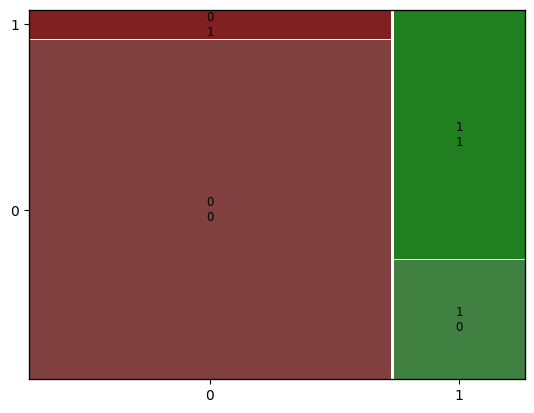

In [62]:
mosaic(conf_matrix)

In [63]:
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

In [64]:
accuracy = (TP + TN) / (TN + TP + FN + FP)
print("accuracy = ", accuracy)

accuracy =  0.8559703733360025


In [65]:
sensitivity = TP / (FN + TP)
print("sensitivity = ", sensitivity)

sensitivity =  0.6769811320754717


In [66]:
specificity = TN / (TN + FP)
print("specificity = ", specificity)

specificity =  0.920583026835581


# **BIVARIATE VISUALIZATIONS**

<Axes: xlabel='Yearly_equip_failure', ylabel='count'>

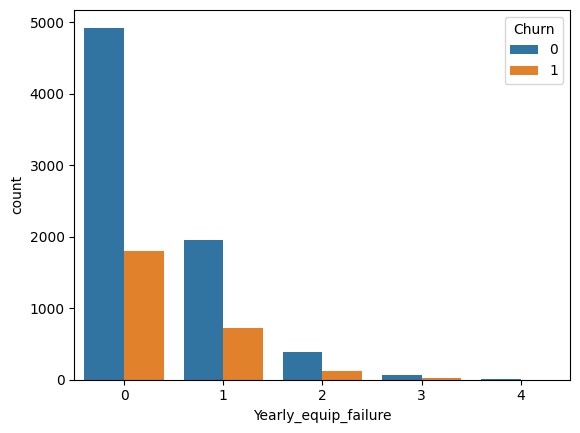

In [32]:
sns.countplot(x='Yearly_equip_failure', hue = 'Churn', data=df)

<Axes: xlabel='Techie', ylabel='count'>

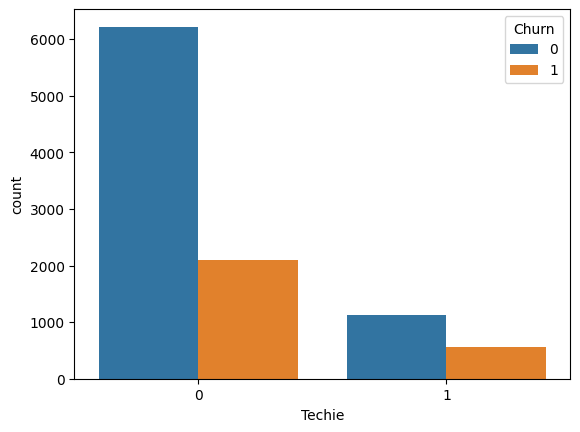

In [33]:
sns.countplot(x='Techie', hue = 'Churn', data=df)

<Axes: xlabel='Port_modem', ylabel='count'>

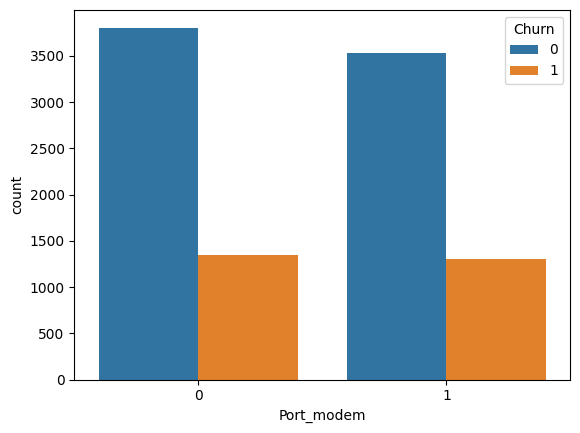

In [35]:
sns.countplot(x='Port_modem', hue = 'Churn', data=df)

<Axes: xlabel='Tablet', ylabel='count'>

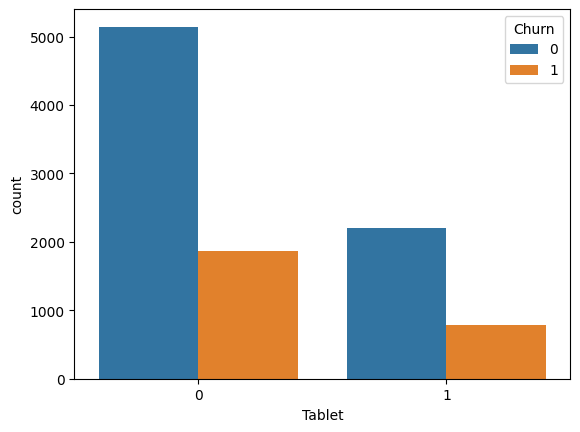

In [36]:
sns.countplot(x='Tablet', hue = 'Churn', data=df)

<Axes: xlabel='InternetService_DSL', ylabel='count'>

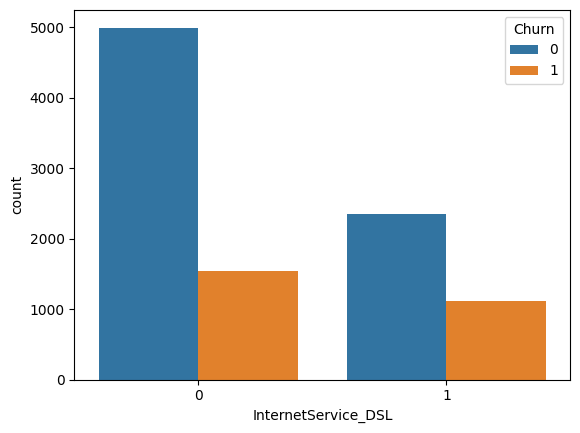

In [37]:
sns.countplot(x='InternetService_DSL', hue = 'Churn', data=df)

<Axes: xlabel='InternetService_FiberOptic', ylabel='count'>

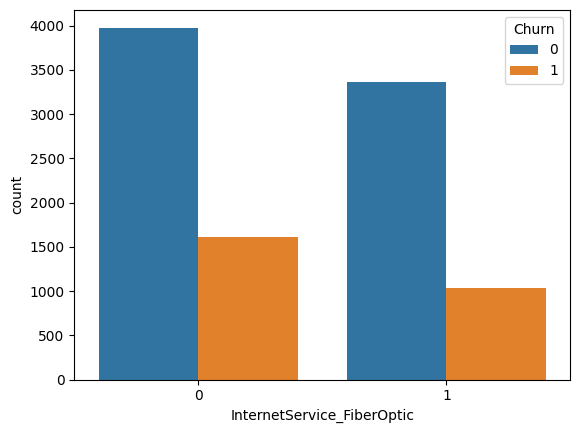

In [38]:
sns.countplot(x='InternetService_FiberOptic', hue = 'Churn', data=df)

<Axes: xlabel='Phone', ylabel='count'>

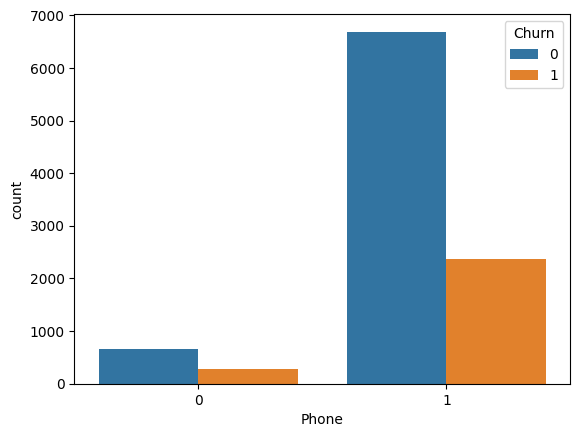

In [39]:
sns.countplot(x='Phone', hue = 'Churn', data=df)

<Axes: xlabel='Multiple', ylabel='count'>

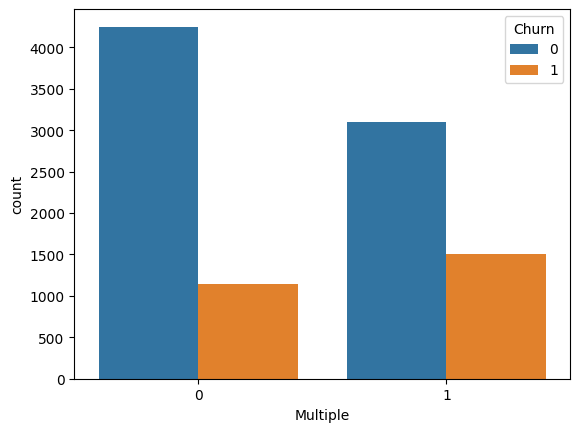

In [40]:
sns.countplot(x='Multiple', hue = 'Churn', data=df)

<Axes: xlabel='OnlineSecurity', ylabel='count'>

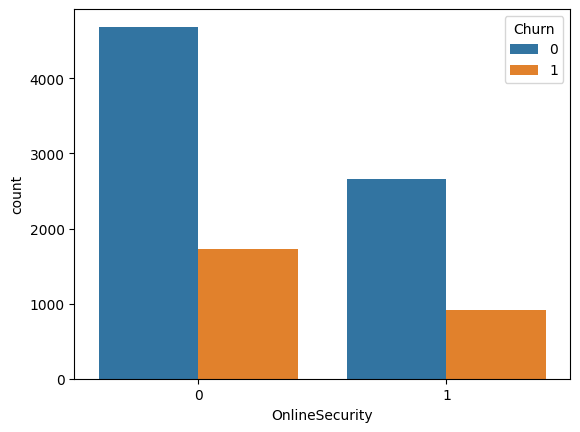

In [41]:
sns.countplot(x='OnlineSecurity', hue = 'Churn', data=df)

<Axes: xlabel='OnlineBackup', ylabel='count'>

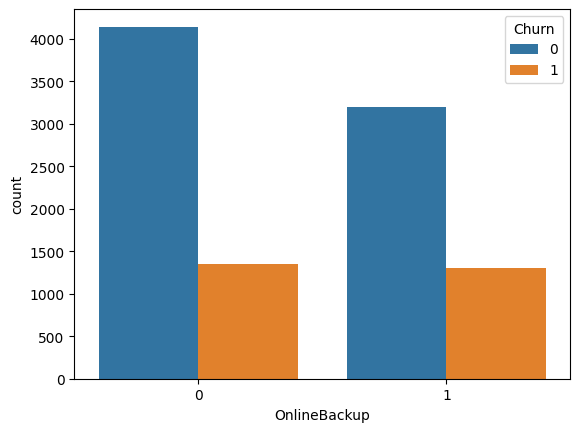

In [42]:
sns.countplot(x='OnlineBackup', hue = 'Churn', data=df)

<Axes: xlabel='StreamingTV', ylabel='count'>

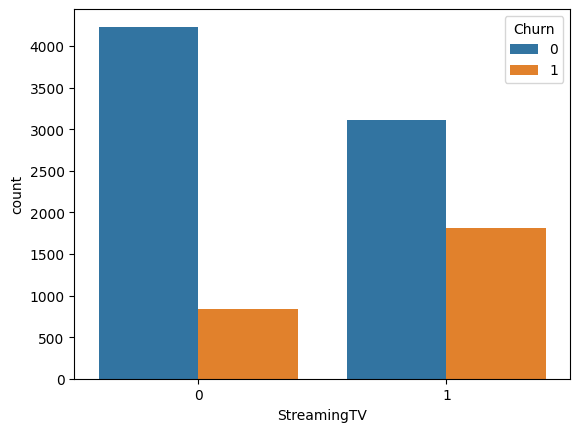

In [43]:
sns.countplot(x='StreamingTV', hue = 'Churn', data=df)

<Axes: xlabel='StreamingMovies', ylabel='count'>

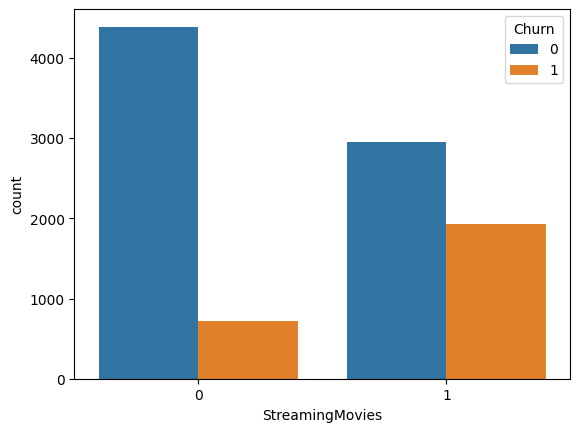

In [44]:
sns.countplot(x='StreamingMovies', hue = 'Churn', data=df)

<Axes: xlabel='Churn', ylabel='count'>

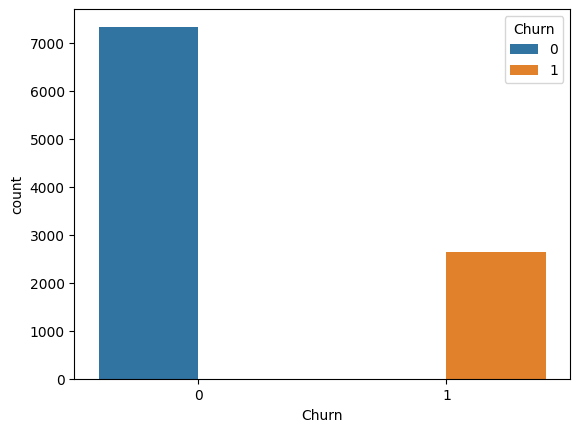

In [45]:
sns.countplot(x='Churn', hue = 'Churn', data=df)

<Axes: xlabel='Population', ylabel='Count'>

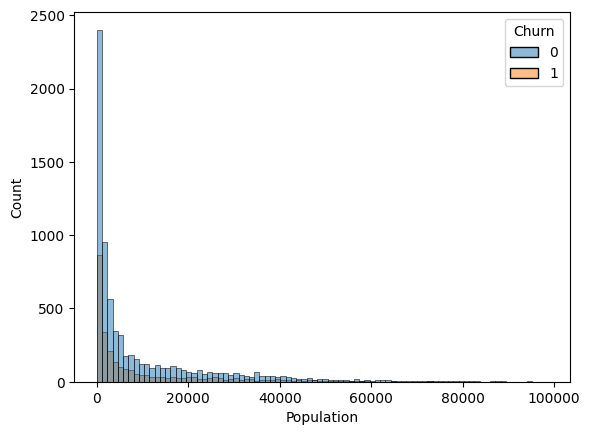

In [46]:
sns.histplot(x="Population", hue = "Churn", data=df)

<Axes: xlabel='Age', ylabel='Count'>

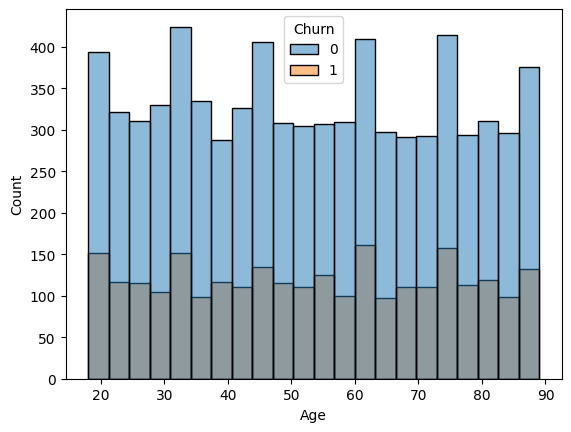

In [47]:
sns.histplot(x="Age", hue = "Churn", data=df)

<Axes: xlabel='Income', ylabel='Count'>

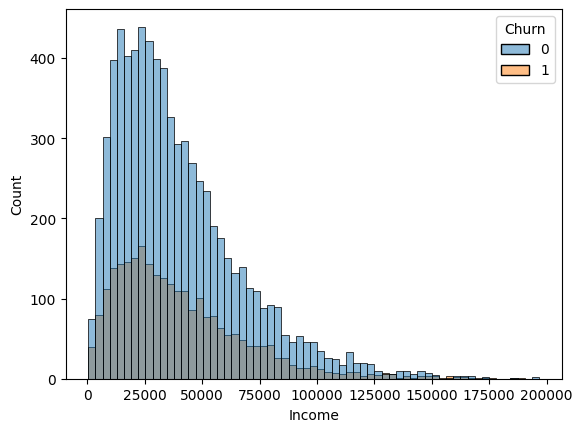

In [48]:
sns.histplot(x="Income", hue = "Churn", data=df)

<Axes: xlabel='Bandwidth_GB_Year', ylabel='Count'>

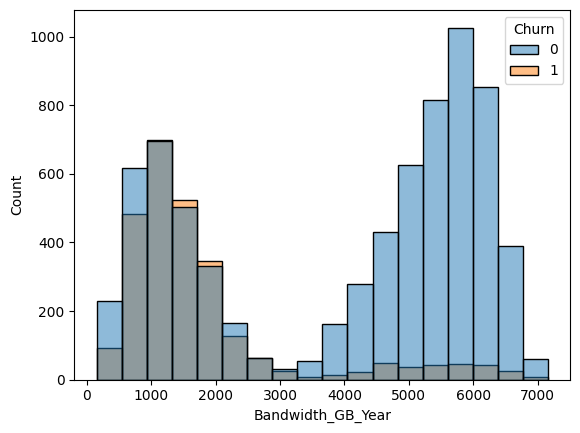

In [49]:
sns.histplot(x="Bandwidth_GB_Year", hue = "Churn", data=df)

<Axes: xlabel='Outage_sec_perweek', ylabel='Count'>

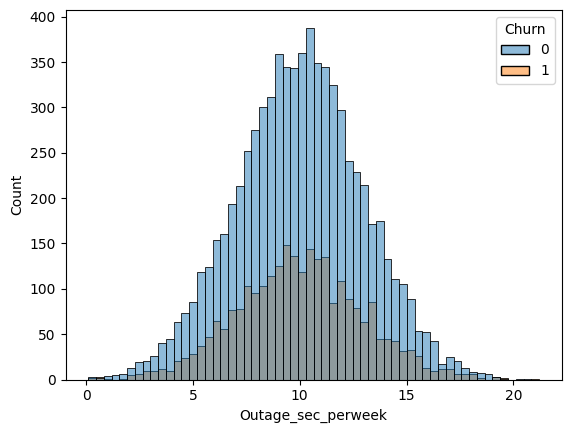

In [50]:
sns.histplot(x="Outage_sec_perweek", hue = "Churn", data=df)

<Axes: xlabel='Tenure', ylabel='Count'>

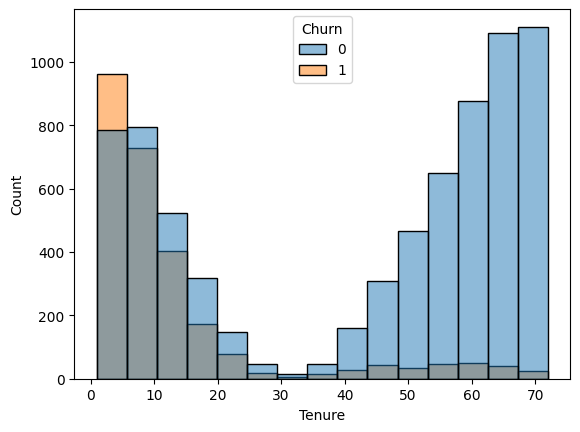

In [51]:
sns.histplot(x="Tenure", hue = "Churn", data=df)

<Axes: xlabel='MonthlyCharge', ylabel='Count'>

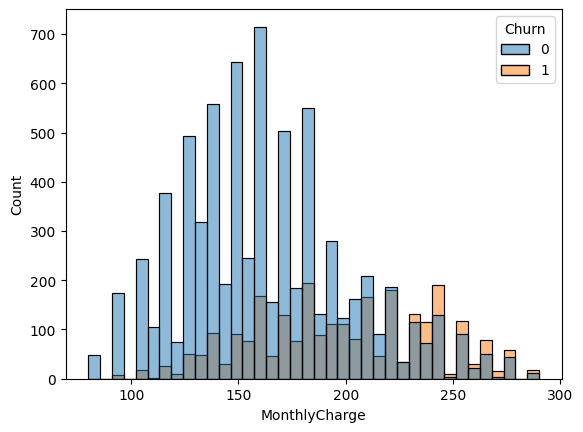

In [52]:
sns.histplot(x="MonthlyCharge", hue = "Churn", data=df)